In [12]:
from uszipcode import SearchEngine
import pandas as pd
import numpy as np
from scipy import stats

In [13]:
search = SearchEngine(simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive)

# NY 
zipcodes = search.by_state("NY", returns=None)

zipcode_info_list = []
for zipcode in zipcodes:
    zipcode_info = zipcode.to_dict()
    zipcode_info_list.append(zipcode_info)

# Convert 
df = pd.DataFrame(zipcode_info_list)

In [14]:
# Features 
features = [
    "zipcode",
    "population",
    "population_density",
    "population_by_age",
    "population_by_gender",
    "population_by_race",
    "families_vs_singles",
    "households_with_kids",
    "children_by_age"
]

In [15]:
df_demographic = df[features]

In [16]:
df_demographic

,zipcode,population,population_density,population_by_age,population_by_gender,population_by_race,families_vs_singles,households_with_kids,children_by_age
0,10001,21102.0,33959.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 336}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 74},..."
1,10002,81410.0,92573.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 1907...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 390}..."
2,10003,56024.0,97188.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 689}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 143}..."
3,10004,3089.0,5519.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 111}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 27},..."
4,10005,7135.0,97048.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 115}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 16},..."
...,...,...,...,...,...,...,...,...,...
1663,14901,16736.0,448.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 548}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 96},..."
1664,14903,7567.0,363.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 220}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 45},..."
1665,14904,16269.0,2896.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 601}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 119}..."
1666,14905,9070.0,2177.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 308}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 61},..."


In [17]:
nyc_zipcodes = [
    '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012',
    '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024',
    '10025', '10026', '10027', '10028', '10029', '10030', '10031', '10032', '10033', '10034', '10035',
    '10036', '10037', '10038', '10039', '10040', '10044', '10045', '10055', '10060', '10065', '10069',
    '10075', '10080', '10103', '10110', '10111', '10112', '10115', '10119', '10128', '10151', '10152',
    '10153', '10154', '10162', '10165', '10167', '10168', '10169', '10170', '10171', '10172', '10173',
    '10174', '10177', '10199', '10271', '10278', '10279', '10280', '10281', '10282', '10301', '10302',
    '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10314',
    '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461',
    '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472',
    '10473', '10474', '10475', '11004', '11005', '11101', '11102', '11103', '11104', '11105', '11106',
    '11109', '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211',
    '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222',
    '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234',
    '11235', '11236', '11237', '11238', '11239', '11249', '11251', '11354', '11355', '11356', '11357',
    '11358', '11359', '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368',
    '11369', '11370', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411',
    '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11422',
    '11423', '11426', '11427', '11428', '11429', '11430', '11432', '11433', '11434', '11435', '11436',
    '11691', '11692', '11693', '11694', '11697'
]

In [18]:
# Filter 
df_cleaned = df_demographic[df_demographic['zipcode'].isin(nyc_zipcodes)]
df_cleaned

,zipcode,population,population_density,population_by_age,population_by_gender,population_by_race,families_vs_singles,households_with_kids,children_by_age
0,10001,21102.0,33959.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 336}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 74},..."
1,10002,81410.0,92573.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 1907...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 390}..."
2,10003,56024.0,97188.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 689}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 143}..."
3,10004,3089.0,5519.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 111}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 27},..."
4,10005,7135.0,97048.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 115}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 16},..."
...,...,...,...,...,...,...,...,...,...
417,11691,60035.0,21185.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 2788...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 556}..."
418,11692,18540.0,18566.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 765}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 152}..."
419,11693,11916.0,11950.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 364}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 71},..."
420,11694,20408.0,14944.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 509}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 86},..."


In [19]:
# Check for null or NaN 
print("Null or NaN values in each column:")
print(df_cleaned.isnull().sum())

Null or NaN values in each column:
zipcode                  0
population              34
population_density      34
population_by_age       26
population_by_gender    26
population_by_race      26
families_vs_singles     31
households_with_kids    31
children_by_age         31
dtype: int64


In [20]:
# Impute 
df_cleaned['population'].fillna(df_cleaned['population'].median(), inplace=True)
df_cleaned['population_density'].fillna(df_cleaned['population_density'].median(), inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_29916\3240316856.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['population'].fillna(df_cleaned['population'].median(), inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_29916\3240316856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['population'].fillna(df_cle

In [21]:
# Function to impute 
def impute_nested(column):
    non_na_values = df_cleaned[column].dropna()
    if not non_na_values.empty:
        mode_structure = non_na_values.mode().iloc[0]
        df_cleaned[column] = df_cleaned[column].apply(lambda x: mode_structure if x is None else x)

# Impute 
nested_columns = [
    'population_by_age', 'population_by_gender', 'population_by_race', 
    'families_vs_singles', 'households_with_kids', 'children_by_age'
]

for col in nested_columns:
    impute_nested(col)

C:\Users\simon\AppData\Local\Temp\ipykernel_29916\1087372650.py:5: UserWarning: Unable to sort modes: '<' not supported between instances of 'dict' and 'dict'
  mode_structure = non_na_values.mode().iloc[0]
C:\Users\simon\AppData\Local\Temp\ipykernel_29916\1087372650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = df_cleaned[column].apply(lambda x: mode_structure if x is None else x)


In [22]:
# Check null or NaN 
print("Null or NaN values in each column:")
print(df_cleaned.isnull().sum())

Null or NaN values in each column:
zipcode                 0
population              0
population_density      0
population_by_age       0
population_by_gender    0
population_by_race      0
families_vs_singles     0
households_with_kids    0
children_by_age         0
dtype: int64


In [23]:
df_cleaned

,zipcode,population,population_density,population_by_age,population_by_gender,population_by_race,families_vs_singles,households_with_kids,children_by_age
0,10001,21102.0,33959.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 336}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 74},..."
1,10002,81410.0,92573.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 1907...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 390}..."
2,10003,56024.0,97188.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 689}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 143}..."
3,10004,3089.0,5519.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 111}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 27},..."
4,10005,7135.0,97048.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 115}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 16},..."
...,...,...,...,...,...,...,...,...,...
417,11691,60035.0,21185.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 2788...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 556}..."
418,11692,18540.0,18566.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 765}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 152}..."
419,11693,11916.0,11950.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 364}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 71},..."
420,11694,20408.0,14944.0,"[{'key': 'Male', 'values': [{'x': 0, 'y': 509}...","[{'key': 'Data', 'values': [{'x': 'Male', 'y':...","[{'key': 'Data', 'values': [{'x': 'White', 'y'...","[{'key': 'Data', 'values': [{'x': 'Husband Wif...","[{'key': 'Data', 'values': [{'x': 'Households ...","[{'key': 'Male', 'values': [{'x': 0, 'y': 86},..."


In [27]:
df_cleaned.to_csv('demographic_data.csv', index=False)

## Flatten and sort data

In [325]:
import json

df = pd.read_csv('demographic_data.csv')
def flatten_json(json_data, prefix):
    if isinstance(json_data, float) and pd.isna(json_data):
        return {}
    if isinstance(json_data, str):
        try:
            data = json.loads(json_data.replace("'", "\""))
        except json.JSONDecodeError:
            return {}
    elif isinstance(json_data, list):
        data = json_data
    else:
        return {}

    flattened_data = {}
    for item in data:
        key = item['key']
        for value in item['values']:
            flattened_data[f"{prefix}_{key}_{value['x']}"] = value['y']
    return flattened_data

In [326]:
# flatten_json function 
for column in ['population_by_age', 'population_by_gender', 'population_by_race', 
               'families_vs_singles', 'households_with_kids', 'children_by_age']:
    temp_df = df[column].apply(lambda x: pd.Series(flatten_json(x, column)))
    df = pd.concat([df.drop(columns=[column]), temp_df], axis=1)

In [327]:
df

,zipcode,population,population_density,population_by_age_Male_0,population_by_age_Male_1,population_by_age_Male_2,population_by_age_Male_3,population_by_age_Male_4,population_by_age_Male_5,population_by_age_Male_6,...,children_by_age_Total_10,children_by_age_Total_11,children_by_age_Total_12,children_by_age_Total_13,children_by_age_Total_14,children_by_age_Total_15,children_by_age_Total_16,children_by_age_Total_17,children_by_age_Total_18,children_by_age_Total_19
0,10001,21102.0,33959.0,336,240,240,367,875,1309,1150,...,85,89,107,115,81,98,107,498,592,417
1,10002,81410.0,92573.0,1907,1822,1883,2134,2998,3649,3274,...,660,719,741,758,719,821,795,854,909,1047
2,10003,56024.0,97188.0,689,468,342,2399,3358,3810,3180,...,133,143,146,154,161,152,186,2251,3232,2151
3,10004,3089.0,5519.0,111,57,17,30,157,278,262,...,12,9,9,12,17,10,10,16,6,23
4,10005,7135.0,97048.0,115,43,26,27,521,973,713,...,14,10,6,8,8,12,6,16,37,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,2788,2389,2334,2513,2119,2031,1774,...,881,904,908,937,986,981,985,903,996,935
208,11692,18540.0,18566.0,765,746,775,750,680,559,525,...,301,271,297,297,295,307,306,323,292,317
209,11693,11916.0,11950.0,364,373,401,437,371,337,369,...,163,139,150,150,186,205,190,138,177,168
210,11694,20408.0,14944.0,509,566,577,709,526,538,489,...,215,230,221,254,263,280,245,211,238,214


In [328]:
# Function to create broader age groups
def aggregate_age_groups(df, column_prefix):
    age_groups = {
        '0-4': [0, 1, 2, 3, 4],
        '5-9': [5, 6, 7, 8, 9],
        '10-14': [10, 11, 12, 13, 14],
        '15-19': [15, 16, 17, 18, 19]
    }
    for group_name, ages in age_groups.items():
        columns_to_sum = [f"{column_prefix}_{age}" for age in ages if f"{column_prefix}_{age}" in df.columns]
        if columns_to_sum:
            df[f"{column_prefix}_{group_name}"] = df[columns_to_sum].sum(axis=1)
            df.drop(columns=columns_to_sum, inplace=True)
    return df

In [329]:
# Apply 
df = aggregate_age_groups(df, 'population_by_age_Male')
df = aggregate_age_groups(df, 'population_by_age_Female')
df = aggregate_age_groups(df, 'children_by_age_Male')
df = aggregate_age_groups(df, 'children_by_age_Female')

In [330]:
# Sum gender data
df['population_by_gender_Male'] = df[[col for col in df.columns if col.startswith('population_by_age_Male_')]].sum(axis=1)
df['population_by_gender_Female'] = df[[col for col in df.columns if col.startswith('population_by_age_Female_')]].sum(axis=1)


In [331]:
# Sum race data
df['population_by_race_White'] = df['population_by_race_Data_White']
df['population_by_race_Black_Or_African_American'] = df['population_by_race_Data_Black Or African American']
df['population_by_race_Asian'] = df['population_by_race_Data_Asian']
df['population_by_race_American_Indian_Or_Alaskan_Native'] = df['population_by_race_Data_American Indian Or Alaskan Native']
df['population_by_race_Native_Hawaiian_&_Other_Pacific_Islander'] = df['population_by_race_Data_Native Hawaiian & Other Pacific Islander']
df['population_by_race_Other_Race'] = df['population_by_race_Data_Other Race']


In [332]:
# Drop
df.drop(columns=[col for col in df.columns if any(sub in col for sub in ['population_by_age_Male_', 'population_by_age_Female_', 'children_by_age_Male_', 'children_by_age_Female_', 'population_by_race_Data_'])], inplace=True)

In [333]:
# Group by zipcode and sum the values
df_aggregated = df.groupby('zipcode').sum().reset_index()

In [334]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 57 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   zipcode                                                      212 non-null    int64  
 1   population                                                   212 non-null    float64
 2   population_density                                           212 non-null    float64
 3   population_by_age_Total_0                                    212 non-null    int64  
 4   population_by_age_Total_1                                    212 non-null    int64  
 5   population_by_age_Total_2                                    212 non-null    int64  
 6   population_by_age_Total_3                                    212 non-null    int64  
 7   population_by_age_Total_4                                    212 non-null    int

In [335]:
columns_to_drop = [
    'population_by_age_Total_0', 'population_by_age_Total_1','population_by_age_Total_2',
    'population_by_age_Total_3', 'population_by_age_Total_4', 'population_by_age_Total_5', 'population_by_age_Total_6',
    'population_by_age_Total_7', 'population_by_age_Total_8', 'population_by_age_Total_9', 'population_by_age_Total_10',
    'population_by_age_Total_11', 'population_by_age_Total_12', 'population_by_age_Total_13', 'population_by_age_Total_14',
    'population_by_age_Total_15', 'population_by_age_Total_16', 'population_by_age_Total_17']
df_aggregated = df_aggregated.drop(columns=columns_to_drop)

In [336]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 39 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   zipcode                                                      212 non-null    int64  
 1   population                                                   212 non-null    float64
 2   population_density                                           212 non-null    float64
 3   population_by_gender_Data_Male                               212 non-null    int64  
 4   population_by_gender_Data_Female                             212 non-null    int64  
 5   families_vs_singles_Data_Husband Wife Family Households      212 non-null    int64  
 6   families_vs_singles_Data_Single Guardian                     212 non-null    int64  
 7   families_vs_singles_Data_Singles                             212 non-null    int

In [337]:
# Function to aggregate age groups
def aggregate_age_groups(df, column_prefix):
    age_groups = {
        '0-9': range(10),
        '10-15': range(10, 15),
        '16-19': range(16, 20),
    }
    for group_name, ages in age_groups.items():
        columns_to_sum = [f"{column_prefix}_Total_{age}" for age in ages if f"{column_prefix}_Total_{age}" in df.columns]
        if columns_to_sum:
            df[f"{column_prefix}_{group_name}"] = df[columns_to_sum].sum(axis=1)
            df.drop(columns=columns_to_sum, inplace=True)
    return df

In [338]:
# Aggregate age groups for population by gender and children by age
df_aggregated = aggregate_age_groups(df_aggregated, 'children_by_age')

In [339]:
# Sum families vs singles data
df_aggregated['families_vs_singles_Data_Husband_Wife_Family_Households'] = df_aggregated['families_vs_singles_Data_Husband Wife Family Households']
df_aggregated['families_vs_singles_Data_Single_Guardian'] = df_aggregated['families_vs_singles_Data_Single Guardian']
df_aggregated['families_vs_singles_Data_Singles'] = df_aggregated['families_vs_singles_Data_Singles']
df_aggregated['families_vs_singles_Data_Singles_With_Roommate'] = df_aggregated['families_vs_singles_Data_Singles With Roommate']


In [340]:
# Sum households with kids data
df_aggregated['households_with_kids_Data_Households_Without_Kids'] = df_aggregated['households_with_kids_Data_Households Without Kids']
df_aggregated['households_with_kids_Data_Households_With_Kids'] = df_aggregated['households_with_kids_Data_Households With Kids']

In [341]:
# Sum population by gender data
df_aggregated['population_by_gender_Male'] = df_aggregated['population_by_gender_Male']
df_aggregated['population_by_gender_Female'] = df_aggregated['population_by_gender_Female']

In [342]:
# Drop the original columns
df_aggregated.drop(columns=['families_vs_singles_Data_Husband Wife Family Households',
                            'families_vs_singles_Data_Single Guardian',
                            'families_vs_singles_Data_Singles',
                            'families_vs_singles_Data_Singles With Roommate',
                            'households_with_kids_Data_Households Without Kids',
                            'households_with_kids_Data_Households With Kids',
                            'population_by_gender_Male',
                            'population_by_gender_Female'], inplace=True)

In [343]:
df_aggregated

,zipcode,population,population_density,population_by_gender_Data_Male,population_by_gender_Data_Female,children_by_age_Total_15,population_by_race_White,population_by_race_Black_Or_African_American,population_by_race_Asian,population_by_race_American_Indian_Or_Alaskan_Native,population_by_race_Native_Hawaiian_&_Other_Pacific_Islander,population_by_race_Other_Race,children_by_age_0-9,children_by_age_10-15,children_by_age_16-19,families_vs_singles_Data_Husband_Wife_Family_Households,families_vs_singles_Data_Single_Guardian,families_vs_singles_Data_Singles_With_Roommate,households_with_kids_Data_Households_Without_Kids,households_with_kids_Data_Households_With_Kids
0,10001,21102.0,33959.0,10184,10918,98,13722,1897,3539,75,5,1063,1034,477,1614,2038,1138,1960,9853,1178
1,10002,81410.0,92573.0,38570,42840,821,25506,6836,37914,374,32,7997,7345,3597,3605,10721,7370,3137,25351,7574
2,10003,56024.0,97188.0,26750,29274,152,42794,1977,8088,101,24,1256,2096,737,7820,5620,1453,5418,26216,2343
3,10004,3089.0,5519.0,1610,1479,10,2167,97,655,8,1,46,247,59,55,500,84,305,1441,251
4,10005,7135.0,97048.0,3443,3692,12,5001,242,1480,10,2,160,253,46,136,732,198,1194,3952,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,28160,31875,981,18605,30103,1197,475,62,7220,9984,4616,3819,6454,6655,766,11146,8372
208,11692,18540.0,18566.0,8465,10075,307,3049,12304,519,117,9,1829,2930,1461,1238,1788,2593,213,3409,2786
209,11693,11916.0,11950.0,5541,6375,205,6601,3673,372,62,1,818,1482,788,673,1671,1365,208,3158,1545
210,11694,20408.0,14944.0,9962,10446,280,16829,1872,513,39,10,784,2178,1183,908,3514,1339,396,6057,2219


In [344]:
# Function to normalize counts within each category
def normalize_columns(df, columns, total_column):
    if isinstance(total_column, pd.Series):
        for column in columns:
            df[column + '_normalized'] = df[column] / total_column
    else:
        for column in columns:
            df[column + '_normalized'] = df[column] / df[total_column]
    return df

In [345]:
# Normalize children age groups
children_columns = [col for col in df_aggregated.columns if 'children_by_age' in col]
df_aggregated = normalize_columns(df_aggregated, children_columns, df_aggregated[children_columns].sum(axis=1))


In [346]:
# Normalize race data
race_columns = ['population_by_race_White', 'population_by_race_Black_Or_African_American',
                'population_by_race_Asian', 'population_by_race_American_Indian_Or_Alaskan_Native',
                'population_by_race_Native_Hawaiian_&_Other_Pacific_Islander', 'population_by_race_Other_Race']
df_aggregated = normalize_columns(df_aggregated, race_columns, 'population')

In [347]:
# Normalize families vs singles data
household_columns = ['families_vs_singles_Data_Husband_Wife_Family_Households', 'families_vs_singles_Data_Single_Guardian',
                     'families_vs_singles_Data_Singles_With_Roommate']
df_aggregated = normalize_columns(df_aggregated, household_columns, df_aggregated[household_columns].sum(axis=1))

In [348]:
# Normalize households with kids data
households_kids_columns = ['households_with_kids_Data_Households_Without_Kids', 'households_with_kids_Data_Households_With_Kids']
df_aggregated = normalize_columns(df_aggregated, households_kids_columns, df_aggregated[households_kids_columns].sum(axis=1))


In [349]:
# Normalize gender data
gender_columns = ['population_by_gender_Data_Male', 'population_by_gender_Data_Female']
df_aggregated = normalize_columns(df_aggregated, gender_columns, 'population')

In [350]:
df_aggregated

,zipcode,population,population_density,population_by_gender_Data_Male,population_by_gender_Data_Female,children_by_age_Total_15,population_by_race_White,population_by_race_Black_Or_African_American,population_by_race_Asian,population_by_race_American_Indian_Or_Alaskan_Native,...,population_by_race_American_Indian_Or_Alaskan_Native_normalized,population_by_race_Native_Hawaiian_&_Other_Pacific_Islander_normalized,population_by_race_Other_Race_normalized,families_vs_singles_Data_Husband_Wife_Family_Households_normalized,families_vs_singles_Data_Single_Guardian_normalized,families_vs_singles_Data_Singles_With_Roommate_normalized,households_with_kids_Data_Households_Without_Kids_normalized,households_with_kids_Data_Households_With_Kids_normalized,population_by_gender_Data_Male_normalized,population_by_gender_Data_Female_normalized
0,10001,21102.0,33959.0,10184,10918,98,13722,1897,3539,75,...,0.003554,0.000237,0.050374,0.396807,0.221573,0.381620,0.893210,0.106790,0.482608,0.517392
1,10002,81410.0,92573.0,38570,42840,821,25506,6836,37914,374,...,0.004594,0.000393,0.098231,0.505041,0.347183,0.147777,0.769962,0.230038,0.473775,0.526225
2,10003,56024.0,97188.0,26750,29274,152,42794,1977,8088,101,...,0.001803,0.000428,0.022419,0.449924,0.116324,0.433752,0.917959,0.082041,0.477474,0.522526
3,10004,3089.0,5519.0,1610,1479,10,2167,97,655,8,...,0.002590,0.000324,0.014892,0.562430,0.094488,0.343082,0.851655,0.148345,0.521204,0.478796
4,10005,7135.0,97048.0,3443,3692,12,5001,242,1480,10,...,0.001402,0.000280,0.022425,0.344633,0.093220,0.562147,0.929664,0.070336,0.482551,0.517449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,28160,31875,981,18605,30103,1197,475,...,0.007912,0.001033,0.120263,0.465153,0.479640,0.055207,0.571063,0.428937,0.469060,0.530940
208,11692,18540.0,18566.0,8465,10075,307,3049,12304,519,117,...,0.006311,0.000485,0.098652,0.389203,0.564432,0.046365,0.550282,0.449718,0.456580,0.543420
209,11693,11916.0,11950.0,5541,6375,205,6601,3673,372,62,...,0.005203,0.000084,0.068647,0.515105,0.420777,0.064118,0.671486,0.328514,0.465005,0.534995
210,11694,20408.0,14944.0,9962,10446,280,16829,1872,513,39,...,0.001911,0.000490,0.038416,0.669461,0.255096,0.075443,0.731875,0.268125,0.488142,0.511858


In [351]:
# List of columns to drop
columns_to_drop = [
    'children_by_age_0-9', 'children_by_age_10-15', 'children_by_age_16-19',
    'population_by_race_White', 'population_by_race_Black_Or_African_American',
    'population_by_race_Asian', 'population_by_race_American_Indian_Or_Alaskan_Native',
    'population_by_race_Native_Hawaiian_&_Other_Pacific_Islander', 'population_by_race_Other_Race',
    'families_vs_singles_Data_Husband_Wife_Family_Households', 'families_vs_singles_Data_Single_Guardian',
    'families_vs_singles_Data_Singles_With_Roommate', 'households_with_kids_Data_Households_Without_Kids',
    'households_with_kids_Data_Households_With_Kids', 'population_by_gender_Data_Male', 'population_by_gender_Data_Female',
    'children_by_age_Total_15', 'children_by_age_Total_15_normalized'
]

In [ ]:
# Drop the columns
df_cleaned = df_aggregated.drop(columns=columns_to_drop)

In [352]:
df_cleaned

,zipcode,population,population_density,children_by_age_0-9_normalized,children_by_age_10-15_normalized,children_by_age_16-19_normalized,population_by_race_White_normalized,population_by_race_Black_Or_African_American_normalized,population_by_race_Asian_normalized,population_by_race_American_Indian_Or_Alaskan_Native_normalized,population_by_race_Native_Hawaiian_&_Other_Pacific_Islander_normalized,population_by_race_Other_Race_normalized,families_vs_singles_Data_Husband_Wife_Family_Households_normalized,families_vs_singles_Data_Single_Guardian_normalized,families_vs_singles_Data_Singles_With_Roommate_normalized,households_with_kids_Data_Households_Without_Kids_normalized,households_with_kids_Data_Households_With_Kids_normalized,population_by_gender_Data_Male_normalized,population_by_gender_Data_Female_normalized
0,10001,21102.0,33959.0,0.320819,0.147999,0.500776,0.650270,0.089897,0.167709,0.003554,0.000237,0.050374,0.396807,0.221573,0.381620,0.893210,0.106790,0.482608,0.517392
1,10002,81410.0,92573.0,0.477941,0.234058,0.234578,0.313303,0.083970,0.465717,0.004594,0.000393,0.098231,0.505041,0.347183,0.147777,0.769962,0.230038,0.473775,0.526225
2,10003,56024.0,97188.0,0.193984,0.068209,0.723739,0.763851,0.035288,0.144367,0.001803,0.000428,0.022419,0.449924,0.116324,0.433752,0.917959,0.082041,0.477474,0.522526
3,10004,3089.0,5519.0,0.665768,0.159030,0.148248,0.701522,0.031402,0.212043,0.002590,0.000324,0.014892,0.562430,0.094488,0.343082,0.851655,0.148345,0.521204,0.478796
4,10005,7135.0,97048.0,0.565996,0.102908,0.304251,0.700911,0.033917,0.207428,0.001402,0.000280,0.022425,0.344633,0.093220,0.562147,0.929664,0.070336,0.482551,0.517449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,0.514639,0.237938,0.196856,0.309903,0.501424,0.019938,0.007912,0.001033,0.120263,0.465153,0.479640,0.055207,0.571063,0.428937,0.469060,0.530940
208,11692,18540.0,18566.0,0.493598,0.246125,0.208558,0.164455,0.663646,0.027994,0.006311,0.000485,0.098652,0.389203,0.564432,0.046365,0.550282,0.449718,0.456580,0.543420
209,11693,11916.0,11950.0,0.470775,0.250318,0.213787,0.553961,0.308241,0.031219,0.005203,0.000084,0.068647,0.515105,0.420777,0.064118,0.671486,0.328514,0.465005,0.534995
210,11694,20408.0,14944.0,0.478787,0.260057,0.199604,0.824628,0.091729,0.025137,0.001911,0.000490,0.038416,0.669461,0.255096,0.075443,0.731875,0.268125,0.488142,0.511858


In [353]:
# Rename 
df_cleaned.columns = [
    'zipcode', 'population', 'population_density',
    'children_0_9', 'children_10_15', 'children_16_19',
    'race_white', 'race_black', 'race_asian', 'race_american_indian', 'race_pacific_islander', 'race_other',
    'husband_wife_family', 'single_guardian', 'singles_with_roommate',
    'households_without_kids', 'households_with_kids',
    'male', 'female'
]

In [354]:
df_cleaned

,zipcode,population,population_density,children_0_9,children_10_15,children_16_19,race_white,race_black,race_asian,race_american_indian,race_pacific_islander,race_other,husband_wife_family,single_guardian,singles_with_roommate,households_without_kids,households_with_kids,male,female
0,10001,21102.0,33959.0,0.320819,0.147999,0.500776,0.650270,0.089897,0.167709,0.003554,0.000237,0.050374,0.396807,0.221573,0.381620,0.893210,0.106790,0.482608,0.517392
1,10002,81410.0,92573.0,0.477941,0.234058,0.234578,0.313303,0.083970,0.465717,0.004594,0.000393,0.098231,0.505041,0.347183,0.147777,0.769962,0.230038,0.473775,0.526225
2,10003,56024.0,97188.0,0.193984,0.068209,0.723739,0.763851,0.035288,0.144367,0.001803,0.000428,0.022419,0.449924,0.116324,0.433752,0.917959,0.082041,0.477474,0.522526
3,10004,3089.0,5519.0,0.665768,0.159030,0.148248,0.701522,0.031402,0.212043,0.002590,0.000324,0.014892,0.562430,0.094488,0.343082,0.851655,0.148345,0.521204,0.478796
4,10005,7135.0,97048.0,0.565996,0.102908,0.304251,0.700911,0.033917,0.207428,0.001402,0.000280,0.022425,0.344633,0.093220,0.562147,0.929664,0.070336,0.482551,0.517449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,0.514639,0.237938,0.196856,0.309903,0.501424,0.019938,0.007912,0.001033,0.120263,0.465153,0.479640,0.055207,0.571063,0.428937,0.469060,0.530940
208,11692,18540.0,18566.0,0.493598,0.246125,0.208558,0.164455,0.663646,0.027994,0.006311,0.000485,0.098652,0.389203,0.564432,0.046365,0.550282,0.449718,0.456580,0.543420
209,11693,11916.0,11950.0,0.470775,0.250318,0.213787,0.553961,0.308241,0.031219,0.005203,0.000084,0.068647,0.515105,0.420777,0.064118,0.671486,0.328514,0.465005,0.534995
210,11694,20408.0,14944.0,0.478787,0.260057,0.199604,0.824628,0.091729,0.025137,0.001911,0.000490,0.038416,0.669461,0.255096,0.075443,0.731875,0.268125,0.488142,0.511858


In [355]:
df_cleaned.to_csv('cleaned_demographic_data.csv', index=False)

In [356]:
# Convert 
df_json = df_cleaned.set_index('zipcode').to_dict(orient='index')

# Save 
output_path = 'demographic_data_by_zipcode.json'
with open(output_path, 'w') as json_file:
    json.dump(df_json, json_file, indent=4)

In [294]:
df_aggregated

,zipcode,population,population_density,population_by_gender_Data_Male,population_by_gender_Data_Female,children_by_age_Total_0,children_by_age_Total_1,children_by_age_Total_2,children_by_age_Total_3,children_by_age_Total_4,...,population_by_race_American_Indian_Or_Alaskan_Native_normalized,population_by_race_Native_Hawaiian_&_Other_Pacific_Islander_normalized,population_by_race_Other_Race_normalized,families_vs_singles_Data_Husband_Wife_Family_Households_normalized,families_vs_singles_Data_Single_Guardian_normalized,families_vs_singles_Data_Singles_With_Roommate_normalized,households_with_kids_Data_Households_Without_Kids_normalized,households_with_kids_Data_Households_With_Kids_normalized,population_by_gender_Data_Male_normalized,population_by_gender_Data_Female_normalized
0,10001,21102.0,33959.0,10184,10918,141,98,127,118,85,...,0.003554,0.000237,0.050374,0.396807,0.221573,0.381620,0.893210,0.106790,0.482608,0.517392
1,10002,81410.0,92573.0,38570,42840,714,714,750,722,752,...,0.004594,0.000393,0.098231,0.505041,0.347183,0.147777,0.769962,0.230038,0.473775,0.526225
2,10003,56024.0,97188.0,26750,29274,291,292,228,222,207,...,0.001803,0.000428,0.022419,0.449924,0.116324,0.433752,0.917959,0.082041,0.477474,0.522526
3,10004,3089.0,5519.0,1610,1479,43,35,32,24,23,...,0.002590,0.000324,0.014892,0.562430,0.094488,0.343082,0.851655,0.148345,0.521204,0.478796
4,10005,7135.0,97048.0,3443,3692,45,49,41,22,16,...,0.001402,0.000280,0.022425,0.344633,0.093220,0.562147,0.929664,0.070336,0.482551,0.517449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,28160,31875,1082,1131,1061,1014,1003,...,0.007912,0.001033,0.120263,0.465153,0.479640,0.055207,0.571063,0.428937,0.469060,0.530940
208,11692,18540.0,18566.0,8465,10075,291,306,296,299,279,...,0.006311,0.000485,0.098652,0.389203,0.564432,0.046365,0.550282,0.449718,0.456580,0.543420
209,11693,11916.0,11950.0,5541,6375,144,155,148,136,129,...,0.005203,0.000084,0.068647,0.515105,0.420777,0.064118,0.671486,0.328514,0.465005,0.534995
210,11694,20408.0,14944.0,9962,10446,184,215,221,214,231,...,0.001911,0.000490,0.038416,0.669461,0.255096,0.075443,0.731875,0.268125,0.488142,0.511858


## Data for Model + fixed data

In [377]:
import pandas as pd

demographic_data = pd.read_csv('cleaned_demographic_data.csv')

In [378]:
demographic_data['zipcode'] = demographic_data['zipcode'].astype(str)

In [379]:
# Rename 
demographic_data.columns = [
    'zipcode', 'population', 'population_density',
    'children_0_9', 'children_10_15', 'children_16_19',
    'race_white', 'race_black', 'race_asian', 'race_american_indian', 'race_pacific_islander', 'race_other',
    'husband_wife_family', 'single_guardian', 'singles_with_roommate',
    'households_without_kids', 'households_with_kids',
    'male', 'female'
]


In [380]:
# Merge 
demographic_data['family_household'] = (
    demographic_data['husband_wife_family'] +
    demographic_data['single_guardian'] +
    demographic_data['households_with_kids']
)

demographic_data['singles_household'] = (
    demographic_data['singles_with_roommate'] +
    demographic_data['households_without_kids']
)

In [381]:
# Normalize the merged columns relative to the total of both merged columns
total_households = demographic_data['family_household'] + demographic_data['singles_household']
demographic_data['family_household'] = demographic_data['family_household'] / total_households
demographic_data['singles_household'] = demographic_data['singles_household'] / total_households


In [382]:
# Drop the old columns if no longer needed
demographic_data.drop(columns=['husband_wife_family', 'single_guardian', 'singles_with_roommate', 'households_without_kids', 'households_with_kids'], inplace=True)

In [383]:
demographic_data

,zipcode,population,population_density,children_0_9,children_10_15,children_16_19,race_white,race_black,race_asian,race_american_indian,race_pacific_islander,race_other,male,female,family_household,singles_household
0,10001,21102.0,33959.0,0.320819,0.147999,0.500776,0.650270,0.089897,0.167709,0.003554,0.000237,0.050374,0.482608,0.517392,0.362585,0.637415
1,10002,81410.0,92573.0,0.477941,0.234058,0.234578,0.313303,0.083970,0.465717,0.004594,0.000393,0.098231,0.473775,0.526225,0.541131,0.458869
2,10003,56024.0,97188.0,0.193984,0.068209,0.723739,0.763851,0.035288,0.144367,0.001803,0.000428,0.022419,0.477474,0.522526,0.324144,0.675856
3,10004,3089.0,5519.0,0.665768,0.159030,0.148248,0.701522,0.031402,0.212043,0.002590,0.000324,0.014892,0.521204,0.478796,0.402632,0.597368
4,10005,7135.0,97048.0,0.565996,0.102908,0.304251,0.700911,0.033917,0.207428,0.001402,0.000280,0.022425,0.482551,0.517449,0.254095,0.745905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11691,60035.0,21185.0,0.514639,0.237938,0.196856,0.309903,0.501424,0.019938,0.007912,0.001033,0.120263,0.469060,0.530940,0.686865,0.313135
208,11692,18540.0,18566.0,0.493598,0.246125,0.208558,0.164455,0.663646,0.027994,0.006311,0.000485,0.098652,0.456580,0.543420,0.701676,0.298324
209,11693,11916.0,11950.0,0.470775,0.250318,0.213787,0.553961,0.308241,0.031219,0.005203,0.000084,0.068647,0.465005,0.534995,0.632198,0.367802
210,11694,20408.0,14944.0,0.478787,0.260057,0.199604,0.824628,0.091729,0.025137,0.001911,0.000490,0.038416,0.488142,0.511858,0.596341,0.403659


In [384]:
demographic_data.to_csv('demographic_model.csv', index=False)

In [385]:
# Convert to JSON
df_json = demographic_data.set_index('zipcode').to_dict(orient='index')

# Save to JSON file
output_path = 'demographic_data_by_zipcode.json'
with open(output_path, 'w') as json_file:
    json.dump(df_json, json_file, indent=4)

## Plot for visualization

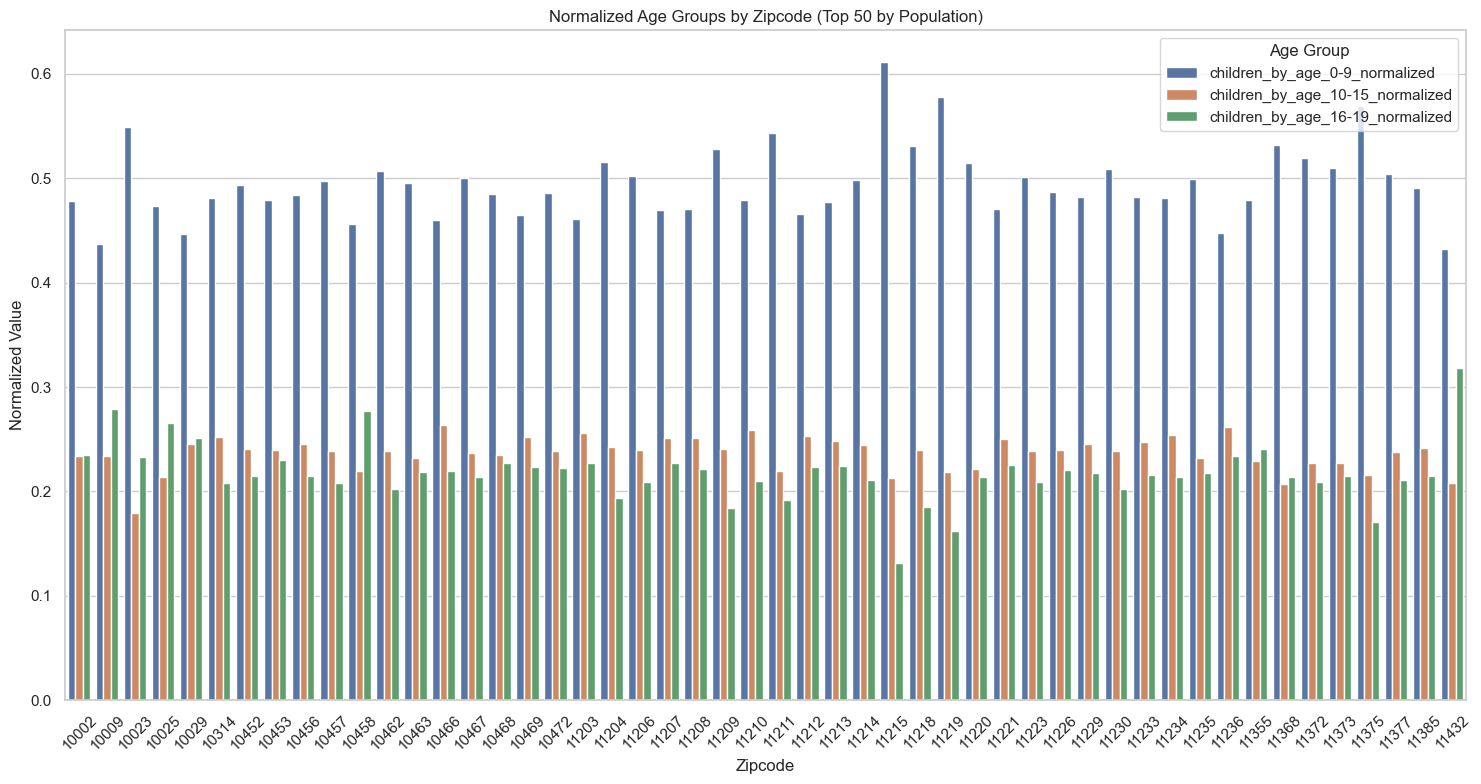

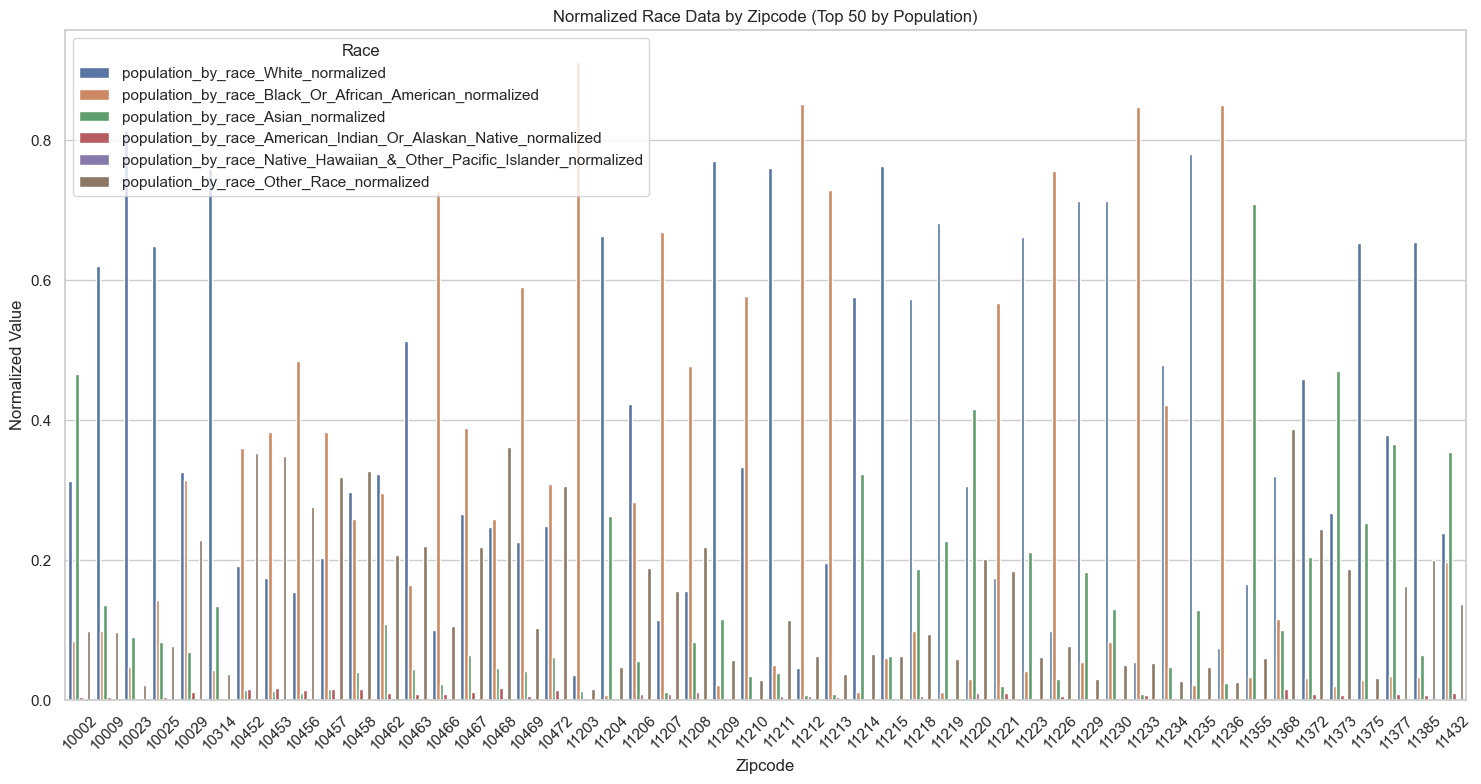

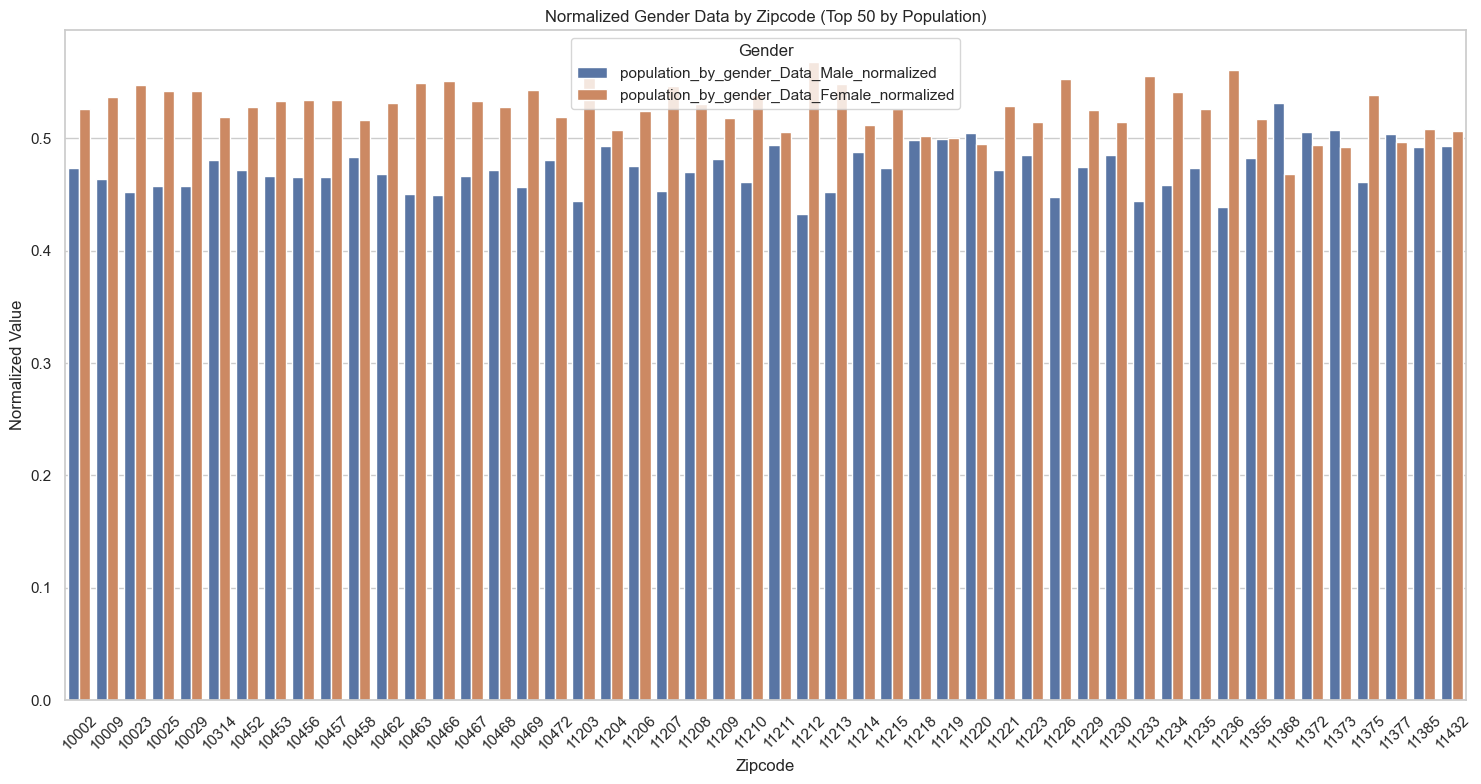

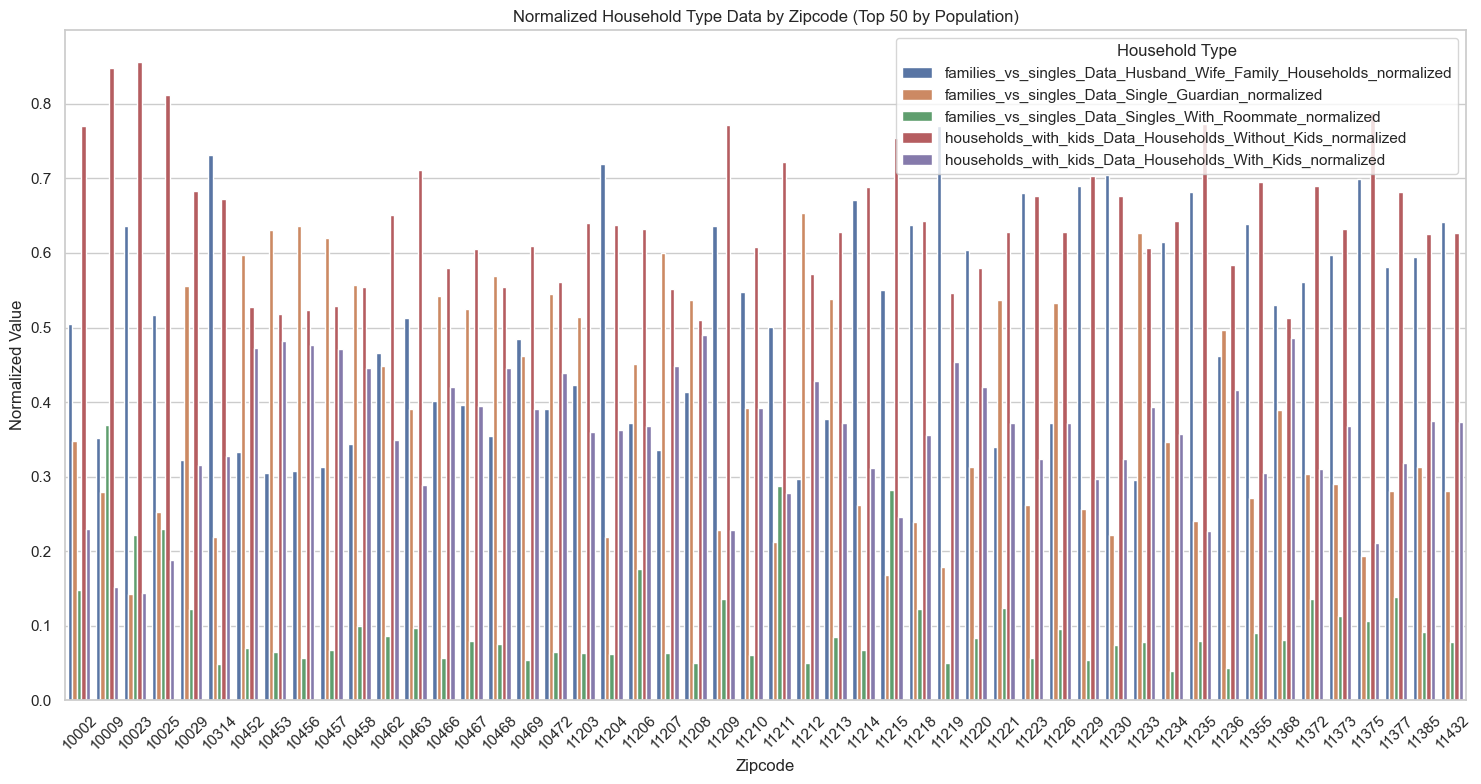

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Get the top 50 zipcodes by population
top_zipcodes = df_aggregated.nlargest(50, 'population')['zipcode']

# Filter the dataframe for only the top 50 zipcodes
df_top = df_aggregated[df_aggregated['zipcode'].isin(top_zipcodes)]

# Define the features to visualize
age_features = ['children_by_age_0-9_normalized', 'children_by_age_10-15_normalized', 'children_by_age_16-19_normalized']
race_features = ['population_by_race_White_normalized', 'population_by_race_Black_Or_African_American_normalized',
                 'population_by_race_Asian_normalized', 'population_by_race_American_Indian_Or_Alaskan_Native_normalized',
                 'population_by_race_Native_Hawaiian_&_Other_Pacific_Islander_normalized', 'population_by_race_Other_Race_normalized']
gender_features = ['population_by_gender_Data_Male_normalized', 'population_by_gender_Data_Female_normalized']
household_features = ['families_vs_singles_Data_Husband_Wife_Family_Households_normalized', 'families_vs_singles_Data_Single_Guardian_normalized',
                      'families_vs_singles_Data_Singles_With_Roommate_normalized', 'households_with_kids_Data_Households_Without_Kids_normalized',
                      'households_with_kids_Data_Households_With_Kids_normalized']

# Plotting normalized age groups by zipcode
plt.figure(figsize=(15, 8))
age_df = df_top[['zipcode'] + age_features].melt(id_vars=['zipcode'], var_name='Age Group', value_name='Normalized Value')
sns.barplot(x='zipcode', y='Normalized Value', hue='Age Group', data=age_df)
plt.title('Normalized Age Groups by Zipcode (Top 50 by Population)')
plt.xlabel('Zipcode')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting normalized race data by zipcode
plt.figure(figsize=(15, 8))
race_df = df_top[['zipcode'] + race_features].melt(id_vars=['zipcode'], var_name='Race', value_name='Normalized Value')
sns.barplot(x='zipcode', y='Normalized Value', hue='Race', data=race_df)
plt.title('Normalized Race Data by Zipcode (Top 50 by Population)')
plt.xlabel('Zipcode')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting normalized gender data by zipcode
plt.figure(figsize=(15, 8))
gender_df = df_top[['zipcode'] + gender_features].melt(id_vars=['zipcode'], var_name='Gender', value_name='Normalized Value')
sns.barplot(x='zipcode', y='Normalized Value', hue='Gender', data=gender_df)
plt.title('Normalized Gender Data by Zipcode (Top 50 by Population)')
plt.xlabel('Zipcode')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting normalized household type data by zipcode
plt.figure(figsize=(15, 8))
household_df = df_top[['zipcode'] + household_features].melt(id_vars=['zipcode'], var_name='Household Type', value_name='Normalized Value')
sns.barplot(x='zipcode', y='Normalized Value', hue='Household Type', data=household_df)
plt.title('Normalized Household Type Data by Zipcode (Top 50 by Population)')
plt.xlabel('Zipcode')
plt.ylabel('Normalized Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data for Modelling

In [345]:
import pandas as pd

demographic_data = pd.read_csv('demographic_model.csv')